In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.widgets import Button, Slider

from scipy.fft import fft, ifft, fftshift, fftfreq
from scipy.interpolate import interp1d
import scipy.signal
from scipy import integrate
from scipy.signal.windows import blackman

In [2]:
import matplotlib
%matplotlib ipympl

# Instructions! ✨

1. If you're not comfortable with Fourier transforms, go back to '<font color=#1E81B0>1. Fourier Transform Intro.ipynb</font>' in this folder. Then you may proceed to this notebook. 
2.  Make sure to run the first three cells. If you don't run '%matplotlib ipympl' you will not be able to interact with the figures. 
3. If you want the figures to fit your screen better, you can adjust it by clicking and sliding the bottom right corner of the figure
4. To change given variables in the plot, just move the sliders on the figure.
5. You do not and will not need to know how the code works! You may look at it for your own interest. 

# Apertures and Power patterns 

Let's return to the idea presented in Part 03 of the lectures that <font color=#D92C07>there is Fourier Transform relationship between the aperture arrangement and its resultant power pattern</font>.

In lectures, we saw that the power pattern is defined as: 
$$\require{color} \definecolor{circle}{RGB}{217,86,16} \definecolor{blue}{RGB}{60,100,200} 
    P ({\color{blue}\theta}) \propto \left| 
                        \int_{-\infty}^{\infty} A({\color{circle}x}) e^{ik{\color{circle}x} \sin {\color{blue}\theta}} \; d{\color{circle}x}
                 \right|^2 
$$

In [117]:
##### Defining Functions #####

def deltas(x, c, a):
    mod_result = (x+c)% a
    return np.where(np.isclose(mod_result, 0, atol=1e-8) | np.isclose(mod_result, a, atol=1e-2), 1, 0)


def delta_function(x, c, a):
    return np.where((x >= c-a/2) & (x <= c+a/2), 1, 0)

def gaussian(x,a,b,c):
    return a*np.exp(-0.5*((x-b)/c)**2)


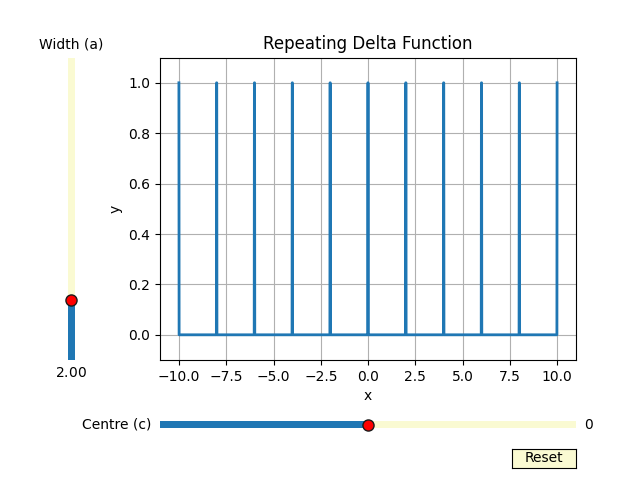

In [118]:
plt.close(fig)

# Set the range and step size for x
x = np.arange(-10, 10, 0.01, dtype='float64')

# Set the value of 'a'
a = 2.
c = 0.

# Create the figure and the slider
fig, ax = plt.subplots()
line, = ax.plot(x, deltas(x, c, a), lw=2) # plotting the function

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the centre.
axcolor = 'lightgoldenrodyellow'
axcentre = fig.add_axes([0.25, 0.1, 0.65, 0.03])
c_slider = Slider(
    ax=axcentre,
    label='Centre (c)',
    valmin=-8,
    valmax=8,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the width
axwidth = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
a_slider = Slider(
    ax=axwidth,
    label="Width (a)",
    valmin=0.02,
    valmax=10,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# The function to be called any time a slider's value changes
def update(val):
    line.set_ydata(deltas(x, c_slider.val, a_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
c_slider.on_changed(update)
a_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    c_slider.reset()
    a_slider.reset()
button.on_clicked(reset)

# # Create the plot
ax.set_ylim(-0.1, 1.1)
ax.set_title(f'Repeating Delta Function')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

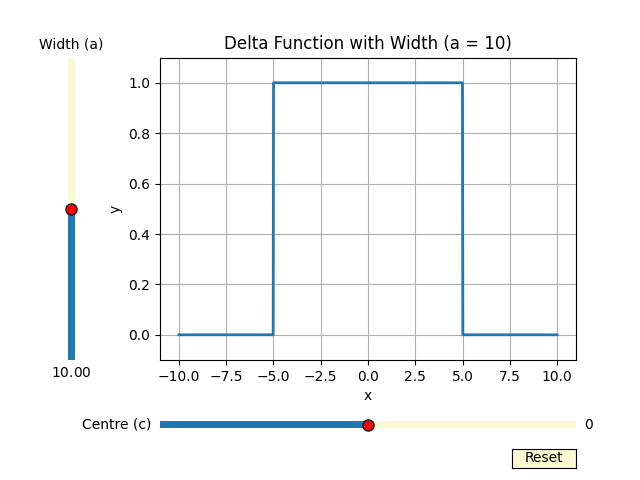

In [83]:
# Set the range and step size for x
x = np.linspace(-10, 10, 1000)

# Set the value of 'a' (width) and the period
c = 0   # Center of the function
a = 10  # Width of the delta function

# Create the figure and the slider
fig, ax = plt.subplots()
line, = ax.plot(x, delta_function(x, c, a), lw=2) # plotting the function

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the centre.
axcolor = 'lightgoldenrodyellow'
axcentre = fig.add_axes([0.25, 0.1, 0.65, 0.03])
c_slider = Slider(
    ax=axcentre,
    label='Centre (c)',
    valmin=-10,
    valmax=10,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the width
axwidth = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
a_slider = Slider(
    ax=axwidth,
    label="Width (a)",
    valmin=0.01,
    valmax=20,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(delta_function(x, c_slider.val, a_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
c_slider.on_changed(update)
a_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    c_slider.reset()
    a_slider.reset()
button.on_clicked(reset)

# # Create the plot
ax.set_ylim(-0.1, 1.1)
ax.set_title(f'Delta Function with Width (a = {a})')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


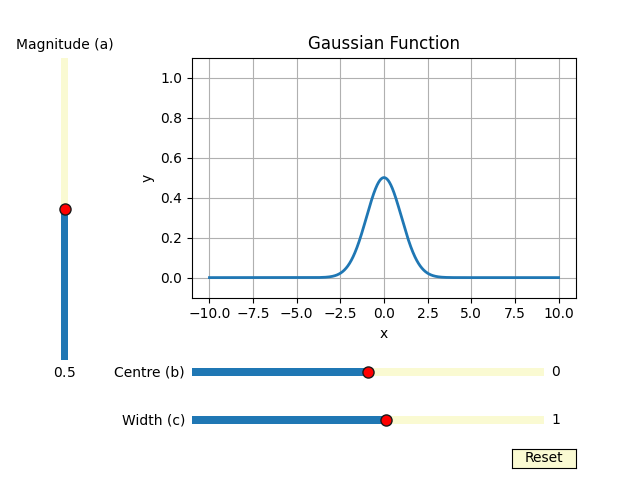

In [84]:
###########################################################################
# Set the range and step size for x
x = np.linspace(-10, 10, 1000)

a=0.5
b=0
c=1 # cannot be 0

# Create the figure and the slider
fig2, ax2 = plt.subplots()
line2, = ax2.plot(x, gaussian(x, a, b, c), lw=2) # plotting the function, line width 2
ax2.set_xlabel('Position [x]')

# adjust the main plot to make room for the sliders
fig2.subplots_adjust(left=0.3, bottom=0.38)

# Make a horizontal slider to control the width.
axwidth = fig2.add_axes([0.3, 0.11, 0.55, 0.03])
c2_slider = Slider(
    ax=axwidth,
    label='Width (c)',
    valmin=-10,
    valmax=10,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a horizontally oriented slider to control the centre
axcentre = fig2.add_axes([0.3, 0.21, 0.55, 0.03])   #[left, bottom, width, height]
b2_slider = Slider(
    ax=axcentre,
    label="Centre (b)",
    valmin=-20,
    valmax=20,
    valinit=b,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the amplitude
axamp = fig2.add_axes([0.09, 0.25, 0.0225, 0.63])
a2_slider = Slider(
    ax=axamp,
    label="Magnitude (a)",
    valmin=-0.5,
    valmax=1.5,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)


# The function to be called anytime a slider's value changes
def update(val):
    line2.set_ydata(gaussian(x, a2_slider.val, b2_slider.val, c2_slider.val))
    fig2.canvas.draw_idle()


# register the update function with each slider
c2_slider.on_changed(update)
b2_slider.on_changed(update)
a2_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig2.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    c2_slider.reset()
    b2_slider.reset()
    a2_slider.reset()
button.on_clicked(reset)

# Create the plot
ax2.set_ylim(-0.1, 1.1)
ax2.set_title(f'Gaussian Function')
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

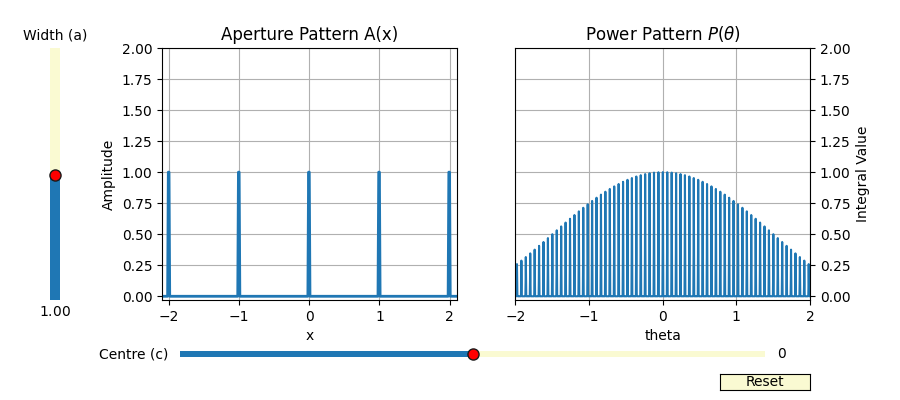

In [135]:
# Parameters
a = 1  # Spacing of delta function
c = 0 # Centre of delta function
wavelength = 1 # Lambda

# Original function
x = np.arange(-10, 10, 0.01, dtype='float64')
Ax = deltas(x, c, a)

N = len(x) # Number of points for plotting

# Frequency domain
theta = np.linspace(-3, 3, N)  # Frequency range
Ptheta = np.zeros_like(theta, dtype=complex)

# Compute fourier transform
w = blackman(N)
Ptheta = fft(Ax * w)
Ptheta = fftshift(Ptheta)
norm = (np.abs(Ptheta)**2).max()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
line1, = ax1.plot(x, Ax, lw=2)
line2, = ax2.plot(theta, np.abs(Ptheta)**2/norm)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.18, bottom=0.25)

# Make a horizontal slider to control the centre.
axcolor = 'lightgoldenrodyellow'
axcentre = fig.add_axes([0.20, 0.1, 0.65, 0.03])
c_slider = Slider(
    ax=axcentre,
    label='Centre (c)',
    valmin=-3,
    valmax=3,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the width
axwidth = fig.add_axes([0.05, 0.25, 0.0225, 0.63])
a_slider = Slider(
    ax=axwidth,
    label="Width (a)",
    valmin=0.02,
    valmax=2,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# The function to be called anytime a slider's value changes
def update(val):
    Ax = deltas(x, c_slider.val, a_slider.val)
    line1.set_ydata(Ax) 
    Ptheta = fftshift(fft(Ax * w))
    norm = (np.abs(Ptheta)**2).max()
    line2.set_ydata(np.abs(Ptheta)**2/norm)
    fig.canvas.draw_idle()

# register the update function with each slider
c_slider.on_changed(update)
a_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    c_slider.reset()
    a_slider.reset()
button.on_clicked(reset)

# Plot the array factor
ax1.set_title('Aperture Pattern A(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.set_xlim([-2.1, 2.1])
ax1.set_ylim([-0.03, 2])

# ax2.set_title(f'Numerical Indefinite Integral of A(x) * e^(i*{k}*sin({theta:.2f})*x)')
ax2.yaxis.set_label_position("right")
ax2.set_title(r'Power Pattern $P(\theta)$')
ax2.yaxis.tick_right()
ax2.set_xlabel('theta')
ax2.set_ylabel('Integral Value')
ax2.grid(True)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-0.03, 2])
plt.show()

In [99]:
plt.close('all')

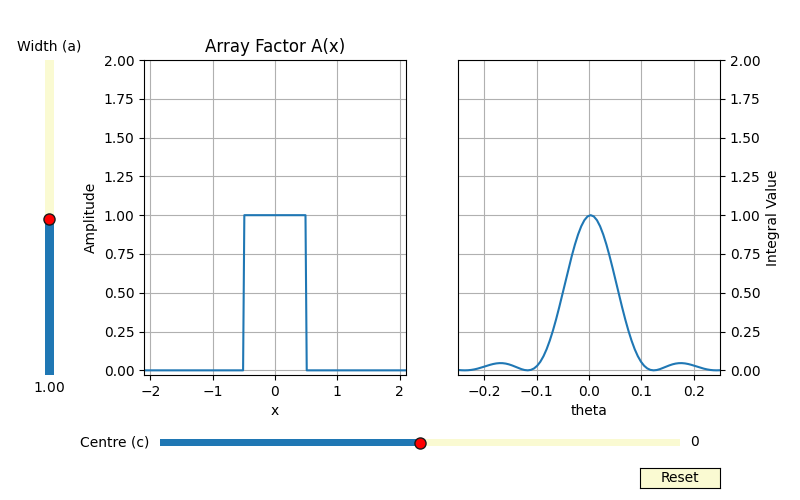

In [128]:
# Parameters
a = 1  # Width of delta function
c = 0 # Centre of delta function
N = 1000  # Number of points for plotting
wavelength = 1 # Lambda

# Time domain
x = np.linspace(-10, 10, N)
Ax = delta_function(x, c, a)

# Frequency domain
theta = np.linspace(-3, 3, N)  # Frequency range
Ptheta = np.zeros_like(theta, dtype=complex)

# Perform Fourier transform 
w = blackman(N)
Ptheta = fft(Ax*w)
Ptheta = fftshift(Ptheta)
norm = (np.abs(Ptheta)**2).max()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
line1, = ax1.plot(x, Ax)
line2, = ax2.plot(theta, np.abs(Ptheta)**2/norm)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.18, bottom=0.25)

# Make a horizontal slider to control the centre.
axcolor = 'lightgoldenrodyellow'
axcentre = fig.add_axes([0.20, 0.1, 0.65, 0.03])
c_slider = Slider(
    ax=axcentre,
    label='Centre (c)',
    valmin=-3,
    valmax=3,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the width
axwidth = fig.add_axes([0.05, 0.25, 0.0225, 0.63])
a_slider = Slider(
    ax=axwidth,
    label="Width (a)",
    valmin=0.02,
    valmax=2,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# The function to be called anytime a slider's value changes
def update(val):
    Ax = delta_function(x, c_slider.val, a_slider.val)
    line1.set_ydata(Ax) 
    Ptheta = fftshift(fft(Ax))
    norm = (np.abs(Ptheta)**2).max()
    line2.set_ydata(np.abs(Ptheta)**2/norm)
    fig.canvas.draw_idle()

# register the update function with each slider
c_slider.on_changed(update)
a_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    c_slider.reset()
    a_slider.reset()
button.on_clicked(reset)



# Plot the array factor
ax1.set_title('Array Factor A(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.set_xlim([-2.1, 2.1])
ax1.set_ylim([-0.03, 2])

# Plot the integral
# ax2.plot(theta, Ptheta.real, label='Real Part')
# ax2.plot(theta, Ptheta.imag, label='Imaginary Part')

# ax2.set_title(f'Numerical Indefinite Integral of A(x) * e^(i*{k}*sin({theta:.2f})*x)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('theta')
ax2.set_ylabel('Integral Value')
ax2.grid(True)
ax2.set_xlim([-0.25, 0.25])
ax2.set_ylim([-0.03, 2])
plt.show()


In [ ]:
# Parameters
a = 1  # Spacing of delta function
c = 0 # Centre of delta function
# N = 1000  # Number of points for plotting
wavelength = 1 # Lambda

# Original function
x = np.arange(-10, 10, 0.01, dtype='float64')
Ax = deltas(x, c, a)

# Frequency domain
theta = np.linspace(-3, 3, len(x))  # Frequency range
Ptheta = np.zeros_like(theta, dtype=complex)

# # Manual Fourier Transform
k = 2 * np.pi/wavelength
# for n in range(-20, 21):  # Consider harmonics from -20 to 20
#     # X += (a/T) * np.sinc(n*a/T) * np.exp(-1j*2*np.pi*n*f/T)
#     Ptheta += Ax * np.exp(1j*k*n*f/T)    # the complex number i is represented as 1j in python. 

def integrand(x, Ax, k, theta):
    return Ax * np.exp(1j * k * np.sin(theta) * x)

# Calculate the integrand
y = integrand(x, Ax, k, theta)

# Perform numerical integration
integral = integrate.cumulative_trapezoid(y, x, initial=0)

# Take modulus
Ptheta = fft(Ax)
Ptheta = fftshift(Ptheta)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
line1, = ax1.plot(x, Ax, lw=2)
line2, = ax2.plot(theta, np.abs(Ptheta)**2)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.18, bottom=0.25)

# Make a horizontal slider to control the centre.
axcolor = 'lightgoldenrodyellow'
axcentre = fig.add_axes([0.20, 0.1, 0.65, 0.03])
c_slider = Slider(
    ax=axcentre,
    label='Centre (c)',
    valmin=-3,
    valmax=3,
    valinit=c,
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# Make a vertically oriented slider to control the width
axwidth = fig.add_axes([0.05, 0.25, 0.0225, 0.63])
a_slider = Slider(
    ax=axwidth,
    label="Width (a)",
    valmin=0.02,
    valmax=2,
    valinit=a,
    orientation="vertical",
    track_color=axcolor,
    handle_style={'edgecolor':'0.1', 'facecolor':'r','size':'8'}
)

# The function to be called anytime a slider's value changes
def update(val):
    Ax = deltas(x, c_slider.val, a_slider.val)
    line1.set_ydata(Ax) 
    Ptheta = fftshift(fft(Ax))
    line2.set_ydata(np.abs(Ptheta)**2)
    fig.canvas.draw_idle()

# register the update function with each slider
c_slider.on_changed(update)
a_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    c_slider.reset()
    a_slider.reset()
button.on_clicked(reset)

# Plot the array factor
ax1.set_title('Array Factor A(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.set_xlim([-2.1, 2.1])
ax1.set_ylim([-0.03, 3])

# Plot the integral
# ax2.plot(theta, Ptheta.real, label='Real Part')
# ax2.plot(theta, Ptheta.imag, label='Imaginary Part')

# ax2.set_title(f'Numerical Indefinite Integral of A(x) * e^(i*{k}*sin({theta:.2f})*x)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('theta')
ax2.set_ylabel('Integral Value')
ax2.grid(True)
ax2.set_xlim([-0.25, 0.25])
plt.show()

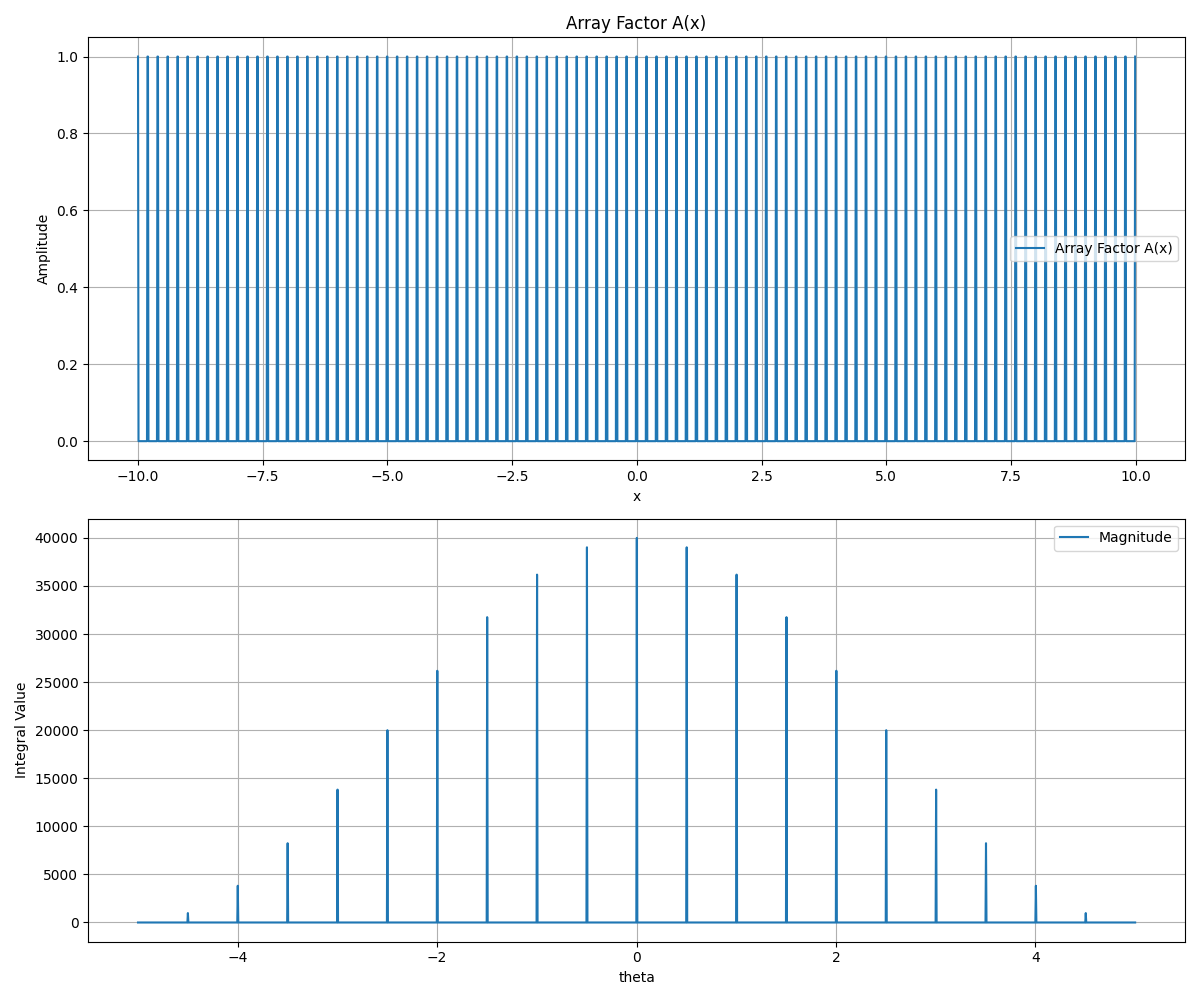

In [ ]:

# Time domain
# step = (10 - (-10)) / 999  # 999 because arange is exclusive of the end point
# x = np.arange(-10, 10 + step/2, step, dtype='float64')
x = np.arange(-10, 10, 0.01, dtype='float64')
a = 0.2
Ax = deltas(x,c, a)

# plt.plot(x, Ax, 'b-')

# Frequency domain
N = 2000
theta = np.linspace(-5, 5, N)  # Frequency range
Ptheta = np.zeros_like(theta, dtype=complex)
k = 2 * np.pi/wavelength

def integrand(x, Ax, k, theta):
    return Ax * np.exp(1j * k * np.sin(theta) * x)

# Calculate the integrand
y = integrand(x, Ax, k, theta)

# Perform numerical integration
integral = integrate.cumulative_trapezoid(y, x, initial=0)

# Take modulus
Fourier = fft(Ax)
Ptheta = fftshift(Fourier)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the array factor
ax1.plot(x, Ax, label='Array Factor A(x)')
ax1.set_title('Array Factor A(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)

# Plot the integral
# ax2.plot(theta, Ptheta, label='Real Part')
# ax2.plot(theta, Ptheta.imag, label='Imaginary Part')
ax2.plot(theta, np.abs(Ptheta)**2, label='Magnitude')
# ax2.set_title(f'Numerical Indefinite Integral of A(x) * e^(i*{k}*sin({theta:.2f})*x)')
ax2.set_xlabel('theta')
ax2.set_ylabel('Integral Value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



# # Calculate the integral
# y = indefinite_integral(x, k, theta)

# # Plotting
# plt.figure(figsize=(12, 8))

# # Real part
# plt.plot(x, y.real, label='Real Part')
# # Imaginary part
# plt.plot(x, y.imag, label='Imaginary Part')
# # Magnitude
# plt.plot(x, np.abs(y), label='Magnitude')

# # Plotting
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# # Time domain plot
# ax1.plot(x, Ax)
# ax1.set_title(f'Delta Function (a={a}, T={T})')
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Amplitude')
# ax1.grid(True)

# # Frequency domain plot
# ax2.plot(f, np.abs(X))
# ax2.set_title('Fourier Transform of Delta Function')
# ax2.set_xlabel('Frequency')
# ax2.set_ylabel('Magnitude')
# ax2.grid(True)

# plt.tight_layout()
# plt.show()